In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
torch.set_default_device(device)
torch.cuda.empty_cache()

In [4]:
class ImageFolderWithPaths(datasets.ImageFolder):
    
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

In [5]:
PATH = '/groups/francescavitali/eb2/NewsubSubImages4/H&E' # /groups/francescavitali/eb2/subImages_slide299/H&E

tensor_transform = transforms.ToTensor()

dataset = ImageFolderWithPaths(PATH, transform = tensor_transform)

In [6]:
len(dataset)

69709

In [16]:
main_fname = dataset.__getitem__(0)[2].split('/')[8]

In [17]:
arr = []
for _, tup in enumerate(dataset):
    img = tup[0]
    fname = tup[2]
    if fname.split('/')[8] != main_fname:
        break
    arr.append(img)

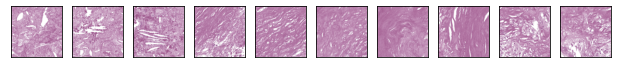

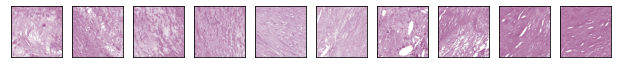

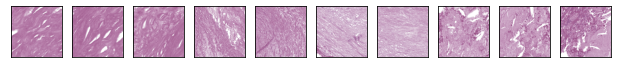

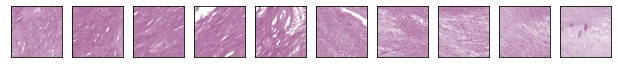

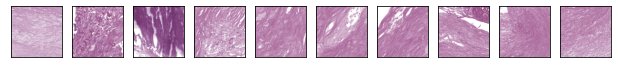

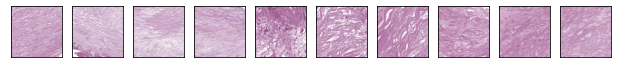

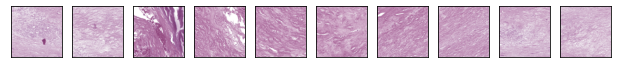

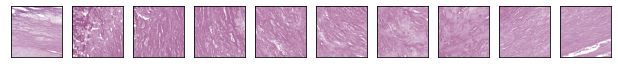

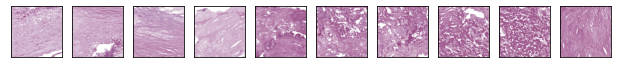

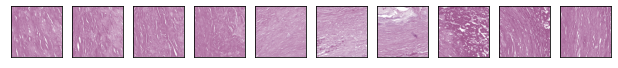

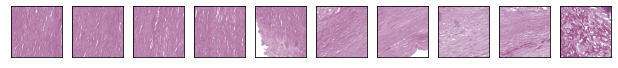

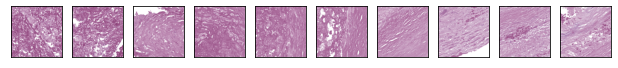

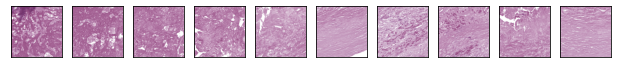

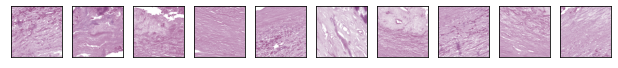

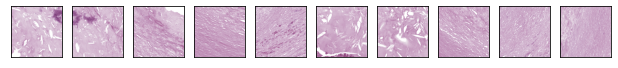

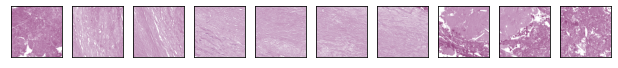

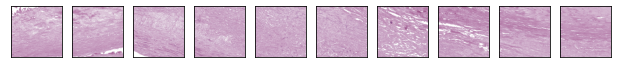

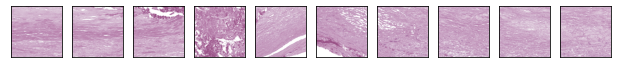

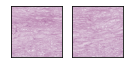

In [30]:
amt = len(arr)
cols = 10
rows = amt // cols + 1

for k in range(rows):
    plt.figure(figsize=(200, 200))
    try:
        for i in range(cols):
            img = arr[i+k*cols].squeeze()
            ax = plt.subplot(cols, amt, i+1)
            img = img.detach().cpu().numpy()
            plt.imshow(np.transpose(img, (1,2,0))) # changes to rgb
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    except IndexError:
        ax.remove()
        break

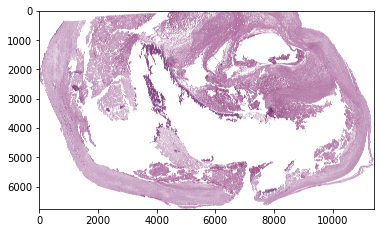

In [28]:
from PIL import Image
path = '/groups/francescavitali/eb2/subImages1/H&E/A/001/001_01.png'
size = 299, 299
with Image.open(path) as im:
    plt.imshow(im)
